<a href="https://colab.research.google.com/github/vladislavlisin/fake_review_detection/blob/main/feature_engeneering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Start**

## **1.1 IMPORTS**

In [ ]:
# работаем в google colab
# подключаем гугл диск с данными
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import time
import tqdm

import torch

In [ ]:
cols = [
    "item_name",
    "date",
    "author",
    "review",
    "rating"
]

## **1.2 MY WB DATASET**

In [ ]:
path = "/content/drive/MyDrive/diplom/data/general_wb_dataset_v1_100k.csv"
corpus = pd.read_csv(path)

In [ ]:
corpus

,Unnamed: 0.1,item_name,date,author,rating,review,Unnamed: 0
0,0,Apple iPhone 14 6+128GB,2023-12-11,Милуся,5,"Изначально испугалась, потому что нажимаю на в...",0.0
1,1,Apple iPhone 14 6+128GB,2023-12-10,Вера,5,"Пришёл на 2 дня раньше заявленного срока, в об...",1.0
2,2,Apple iPhone 14 6+128GB,2023-12-08,Давид,4,"Телефон оригинальный , не активированный , сму...",2.0
3,3,Apple iPhone 14 6+128GB,2023-12-08,Алина Герасимова,5,"Очень боялась заказывать, но решилась. Телефон...",3.0
4,4,Apple iPhone 14 6+128GB,2023-12-04,Александра,5,"Забрала на день раньше,новый,пломбы на месте,б...",4.0
...,...,...,...,...,...,...,...
106579,106579,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-05-25,Ольга,5,"Первое впечатление хорошее, пришли те что зака...",1982.0
106580,106580,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-05-02,Ольга,4,"Уверена, что трвар хороший, но знак ""невозврат...",1983.0
106581,106581,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-03-09,Александра,4,"часы очень хорошие,брала не себе,а маме. Ей нр...",1984.0
106582,106582,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-02-27,Сергей,1,"Это пиндец!!!! Искал, выбирал! Выбрал шикарный...",1985.0


In [ ]:
corpus = corpus[cols]

In [ ]:
corpus.review[0]

'Изначально испугалась, потому что нажимаю на выбор языка русский он не нажимается, 30 минут возюкалась потом перезагрузила все начало работать, все перенесла, телефон хороший не глючит акб 100% спасибо продавцу за хороший оригинальный телефон, надеюсь прослужит долго☺️'

## **1.3 WOMAN DATASET**

In [ ]:
woman_path = "/content/drive/MyDrive/diplom/data/women-clothing-accessories.3-class.balanced.csv"

In [ ]:
woman_corpus = pd.read_csv(woman_path, sep="\t")

In [ ]:
woman_corpus.sentiment.value_counts()

negative    30000
neautral    30000
positive    30000
Name: sentiment, dtype: int64

In [ ]:
mapping = {
    "negative": 2,
    "neautral": 1,
    "positive": 0
}

woman_corpus.sentiment = woman_corpus.sentiment.map(mapping)

In [ ]:
woman_corpus

,review,sentiment
0,качество плохое пошив ужасный (горловина напер...,1.0
1,"Товар отдали другому человеку, я не получила п...",1.0
2,"Ужасная синтетика! Тонкая, ничего общего с пре...",1.0
3,"товар не пришел, продавец продлил защиту без м...",1.0
4,"Кофточка голая синтетика, носить не возможно.",1.0
...,...,...
89995,сделано достаточно хорошо. на ткани сделан рис...,0.0
89996,Накидка шикарная. Спасибо большое провдо линяе...,0.0
89997,спасибо большое ) продовца рекомендую.. заказа...,0.0
89998,Очень довольна заказом! Меньше месяца в РБ. К...,0.0


In [ ]:
woman_corpus.sentiment.value_counts()

1.0    30000
0.0    30000
Name: sentiment, dtype: int64

## **1.4 Yandex dataset**

In [ ]:
maps_path = "/content/drive/MyDrive/diplom/data/geo-reviews-dataset-2023.tskv"

In [ ]:
maps_corpus = pd.read_csv(maps_path)

ParserError: ignored

In [ ]:
import pandas as pd

# Чтение данных из файла tskv
data = []
with open('/content/drive/MyDrive/diplom/data/geo-reviews-dataset-2023.tskv', 'r') as file:
    for line in file:
        row = {}
        # Разделение строки на пары ключ-значение
        pairs = line.split("	")
        for pair in pairs:
            splits = pair.split("=")
            key = splits[0]
            value = splits[1]
            row[key] = value
        data.append(row)

# Создание pandas dataframe
df = pd.DataFrame(data)

# Вывод dataframe
print(df)

                                                  address  \
0       Екатеринбург, ул. Московская / ул. Волгоградск...   
1       Московская область, Электросталь, проспект Лен...   
2       Краснодар, Прикубанский внутригородской округ,...   
3        Санкт-Петербург, проспект Энгельса, 111, корп. 1   
4                       Тверь, Волоколамский проспект, 39   
...                                                   ...   
499995  Москва, Южный административный округ, район Би...   
499996  Москва, Южный административный округ, район Би...   
499997           Новосибирск, Коммунистическая улица, 48А   
499998          Астраханская область, Харабалинский район   
499999          Астраханская область, Харабалинский район   

                      name_ru rating  \
0          Московский квартал     3.   
1           Продукты Ермолино     5.   
2                     LimeFit     1.   
3                Snow-Express     4.   
4          Студия Beauty Brow     5.   
...                       .

In [ ]:
df.to_csv("/content/drive/MyDrive/diplom/data/yandex_dataset.csv")

In [ ]:
yandex_path = "/content/drive/MyDrive/diplom/data/yandex_dataset.csv"

yandex_sd = pd.read_csv(yandex_path)
yandex_sd

,Unnamed: 0,address,name_ru,rating,rubrics,text
0,0,"Екатеринбург, ул. Московская / ул. Волгоградск...",Московский квартал,3.0,Жилой комплекс,Московский квартал 2.\nШумно : летом по ночам ...
1,1,"Московская область, Электросталь, проспект Лен...",Продукты Ермолино,5.0,Магазин продуктов;Продукты глубокой заморозки;...,"Замечательная сеть магазинов в общем, хороший ..."
2,2,"Краснодар, Прикубанский внутригородской округ,...",LimeFit,1.0,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я..."
3,3,"Санкт-Петербург, проспект Энгельса, 111, корп. 1",Snow-Express,4.0,Пункт проката;Прокат велосипедов;Сапсёрфинг,Хорошие условия аренды. \nДружелюбный персонал...
4,4,"Тверь, Волоколамский проспект, 39",Студия Beauty Brow,5.0,"Салон красоты;Визажисты, стилисты;Салон бровей...",Топ мастер Ангелина топ во всех смыслах ) Немн...
...,...,...,...,...,...,...
499995,499995,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,4.0,Железнодорожная станция,"Охрана кривая но добрая, двери не закрываются ..."
499996,499996,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,4.0,Железнодорожная станция,По сравнению со многими современными платформа...
499997,499997,"Новосибирск, Коммунистическая улица, 48А",NaN,5.0,"Бар, паб","Приятная атмосфера, прекрасное вино, волшебная..."
499998,499998,"Астраханская область, Харабалинский район",Сарай-Бату,5.0,Достопримечательность,Был с семьёй 13.06.23 Отличное место. Рекоменд...


In [ ]:
stroka = "address=Екатеринбург, ул. Московская / ул. Волгоградская / ул. Печатников  name_ru=Московский квартал  rating=3.  rubrics=Жилой комплекс  text=Московский квартал 2.\nШумно : летом по ночам дикие гонки. Грязно : кругом стройки, невозможно открыть окна (16 этаж! ), вечно по району летает мусор. Детские площадки убогие, на большой площади однотипные конструкции. Очень дорогая коммуналка. Часто срабатывает пожарная сигнализация. Жильцы уже не реагируют. В это время, обычно около часа, не работают лифты. Из плюсов - отличная планировка квартир ( Московская 194 ), на мой взгляд. Ремонт от застройщика на 3-. Окна вообще жуть - вместо вентиляции. По соотношению цена/качество - 3."

# Разделение строки на пары ключ-значение
pairs = stroka.split("  ")
data = {}
for pair in pairs:
    key, value = pair.split("=")
    data[key] = value

# Вывод словаря
print(data)

{'address': 'Екатеринбург, ул. Московская / ул. Волгоградская / ул. Печатников', 'name_ru': 'Московский квартал', 'rating': '3.', 'rubrics': 'Жилой комплекс', 'text': 'Московский квартал 2.\nШумно : летом по ночам дикие гонки. Грязно : кругом стройки, невозможно открыть окна (16 этаж! ), вечно по району летает мусор. Детские площадки убогие, на большой площади однотипные конструкции. Очень дорогая коммуналка. Часто срабатывает пожарная сигнализация. Жильцы уже не реагируют. В это время, обычно около часа, не работают лифты. Из плюсов - отличная планировка квартир ( Московская 194 ), на мой взгляд. Ремонт от застройщика на 3-. Окна вообще жуть - вместо вентиляции. По соотношению цена/качество - 3.'}


# **2. DATA EXPLORATION**

## **2.1 wildberries**

In [ ]:
corpus

,item_name,date,author,review,rating
0,Apple iPhone 14 6+128GB,2023-12-11,Милуся,"Изначально испугалась, потому что нажимаю на в...",5
1,Apple iPhone 14 6+128GB,2023-12-10,Вера,"Пришёл на 2 дня раньше заявленного срока, в об...",5
2,Apple iPhone 14 6+128GB,2023-12-08,Давид,"Телефон оригинальный , не активированный , сму...",4
3,Apple iPhone 14 6+128GB,2023-12-08,Алина Герасимова,"Очень боялась заказывать, но решилась. Телефон...",5
4,Apple iPhone 14 6+128GB,2023-12-04,Александра,"Забрала на день раньше,новый,пломбы на месте,б...",5
...,...,...,...,...,...
106579,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-05-25,Ольга,"Первое впечатление хорошее, пришли те что зака...",5
106580,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-05-02,Ольга,"Уверена, что трвар хороший, но знак ""невозврат...",4
106581,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-03-09,Александра,"часы очень хорошие,брала не себе,а маме. Ей нр...",4
106582,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-02-27,Сергей,"Это пиндец!!!! Искал, выбирал! Выбрал шикарный...",1


In [ ]:
# нужно запоминать названия товаров иначе пипец дубликатов будет... как бы не хотелось этого избежать
corpus.duplicated().sum()

26382

In [ ]:
clear_corp = corpus.drop_duplicates().reset_index().drop(columns=["index"])
clear_corp

,item_name,date,author,review,rating
0,Apple iPhone 14 6+128GB,2023-12-11,Милуся,"Изначально испугалась, потому что нажимаю на в...",5
1,Apple iPhone 14 6+128GB,2023-12-10,Вера,"Пришёл на 2 дня раньше заявленного срока, в об...",5
2,Apple iPhone 14 6+128GB,2023-12-08,Давид,"Телефон оригинальный , не активированный , сму...",4
3,Apple iPhone 14 6+128GB,2023-12-08,Алина Герасимова,"Очень боялась заказывать, но решилась. Телефон...",5
4,Apple iPhone 14 6+128GB,2023-12-04,Александра,"Забрала на день раньше,новый,пломбы на месте,б...",5
...,...,...,...,...,...
80197,Men’s & Women’s shop Настольные часы Электронные,2023-07-30,Едил,Будильник не работает. Хотя нужен был именно б...,1
80198,Men’s & Women’s shop Настольные часы Электронные,2023-07-21,Ирина,Пользуемся несколько месяцев. Отличные часы. Я...,5
80199,Men’s & Women’s shop Настольные часы Электронные,2022-12-06,Петров,Отличные часы.все работает.пришло хорошо все у...,5
80200,Men’s & Women’s shop Настольные часы Электронные,2022-11-05,Ольга,"Часы работают, вроде все как хотели, габариты ...",4


In [ ]:
rating_counts = corpus.groupby(["date"])['rating'].value_counts().sort_index()

rating_counts

date        rating
2015-12-19  1           1
2016-02-03  5           1
2017-11-15  5           1
2017-11-23  5           1
2017-12-11  5           1
                     ... 
2023-12-11  1          21
            2           7
            3          16
            4          35
            5         187
Name: rating, Length: 4232, dtype: int64

In [ ]:
# сколько вообще продуктов

corpus.item_name.value_counts().iloc[lambda x: x.values>1].index

Index(['UZcotton Футболка хлопок однотонная Премиум большие размеры',
       'ТЕЛОДВИЖЕНИЯ Футболка оверсайз',
       'Ticle Футболка мужская оверсайз хлопок однотонная',
       'Annemore Футболка базовая хлопковая',
       'Varo Футболка хлопок набор 3 шт',
       'GOLDUSTIM Футболка оверсайз однотонная базовая хлопок',
       'Ticle Футболка оверсайз',
       'ТЫСЯЧА СТОЛИЦ Кофта с длинным рукавом оверсайз',
       'HappyFox Футболка базовая однотонная хлопок',
       'UZcotton Футболка классическая хлопок однотонная большие размеры',
       ...
       'EventBox Конфетти для шаров и коробок розово-голубой микс 1см, 50гр.',
       'Страна Карнавалия Наполнитель для шара конфетти',
       'sakvobox.ru Подарочная коробка для цветов круглая',
       'LucyMi Конфетти для праздника цветные 1см 20гр',
       'EventBox Конфетти для шаров и коробок круг 1см',
       'Страна Карнавалия Наполнитель для воздушных шаров конфетти шестиугольник',
       'Страна Карнавалия Конфетти для праздника для

In [ ]:
from matplotlib import pyplot as plt

print(corpus.date.min(), corpus.date.max())

2015-12-19 2023-12-11


In [ ]:
# посмотрим как там распределяются длины текстов по словам

seq_len = [len(str(i).split(" ")) for i in clear_corp['review']]
pd.Series(seq_len).hist(bins = 100, figsize=(15,5))

<Axes: >

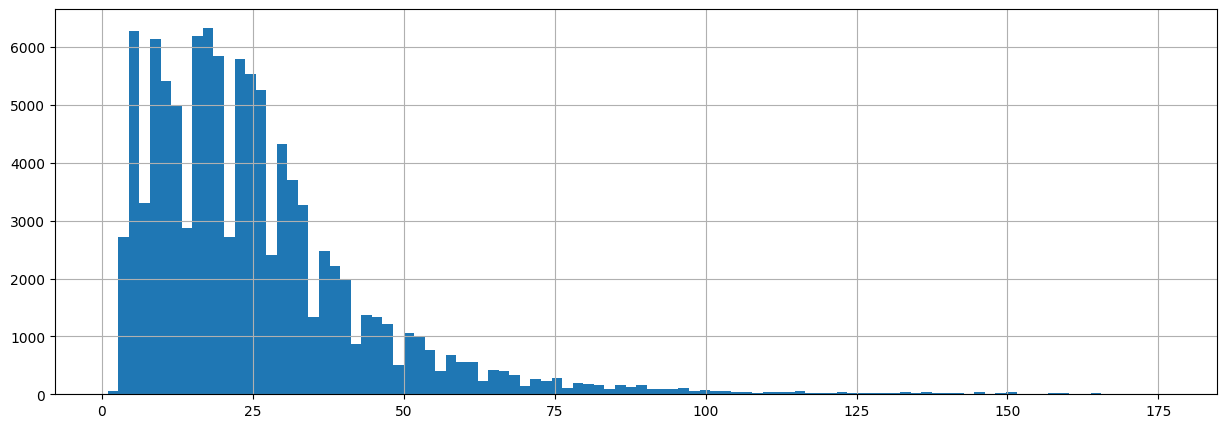

In [ ]:
# посмотрим как там распределяются длины текстов по словам

seq_len = [len(str(i).split(" ")) for i in corpus['review']]
pd.Series(seq_len).hist(bins = 100, figsize=(15,5))

<Axes: >

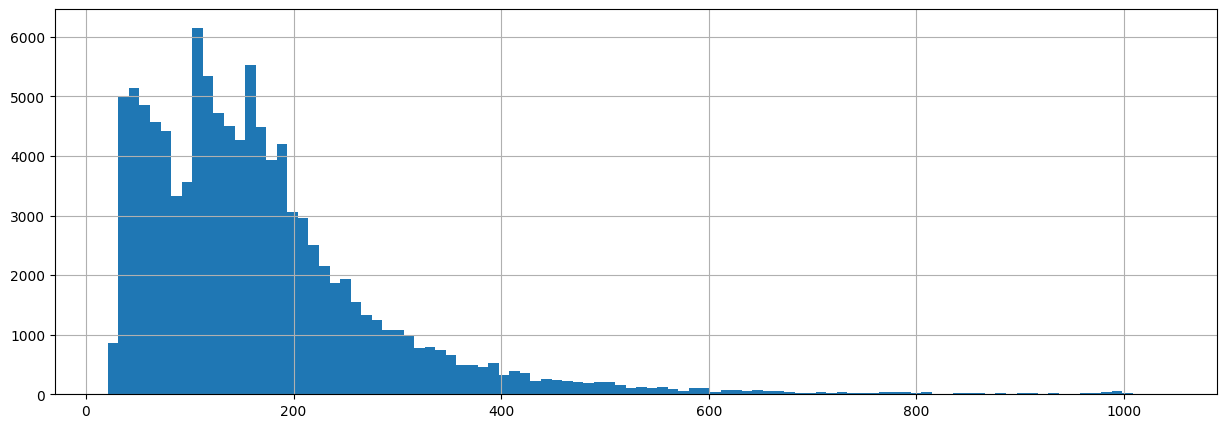

In [ ]:
# посмотрим как там распределяются длины текстов по символам

seq_len = [len(str(i)) for i in corpus['review']]
pd.Series(seq_len).hist(bins = 100, figsize=(15,5))

In [ ]:
corpus.author.value_counts()

Елена                     5757
Покупатель Wildberries    4748
Ольга                     4615
Наталья                   4552
Татьяна                   4517
                          ... 
Кадз                         1
Мегапон                      1
Урсула                       1
Ким Сону                     1
Едил                         1
Name: author, Length: 3385, dtype: int64

In [ ]:
# можнос cделать словарь

names_count = corpus.author.value_counts().to_dict()
names_count

{'Елена': 5757,
 'Покупатель Wildberries': 4748,
 'Ольга': 4615,
 'Наталья': 4552,
 'Татьяна': 4517,
 'Екатерина': 4109,
 'Юлия': 3918,
 'Ирина': 3828,
 'Анастасия': 3680,
 'Анна': 3521,
 'Светлана': 3068,
 'Мария': 2531,
 'Марина': 2494,
 'Виктория': 1899,
 'Дарья': 1744,
 'Оксана': 1622,
 'Надежда': 1426,
 'Ксения': 1363,
 'Евгения': 1258,
 'Людмила': 1223,
 'Александра': 1211,
 'Галина': 1109,
 'Кристина': 1067,
 'Алина': 1017,
 'Александр': 953,
 'Сергей': 858,
 'Валерия': 762,
 'Олеся': 759,
 'Любовь': 750,
 'Яна': 745,
 'Дмитрий': 724,
 'Наталия': 719,
 'Полина': 668,
 'Елизавета': 650,
 'Валентина': 647,
 'Лариса': 636,
 'Алексей': 628,
 'Диана': 572,
 'Алена': 572,
 'Алёна': 546,
 'Вера': 530,
 'Маргарита': 522,
 'Андрей': 501,
 'Инна': 487,
 'Лилия': 438,
 'Вероника': 430,
 'Владимир': 386,
 'Нина': 365,
 'Евгений': 353,
 'Ангелина': 329,
 'Максим': 303,
 'Алла': 301,
 'Михаил': 299,
 'Арина': 290,
 'Роман': 290,
 'Софья': 280,
 'Денис': 276,
 'Карина': 273,
 'Игорь': 266,
 'Л

In [ ]:
mapping = {
    1: 1,
    2: 1,
    3: 1,
    4: 0,
    5: 0
}

corpus["sentiment"] = corpus.rating.map(mapping)

<ipython-input-28-ffc92b336c88>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus["sentiment"] = corpus.rating.map(mapping)


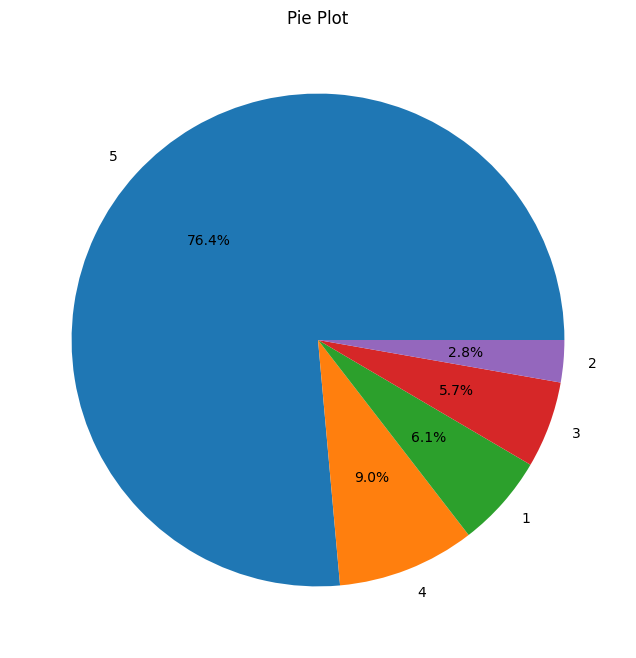

In [ ]:
pos_neg = corpus["rating"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(pos_neg.values, labels=pos_neg.index, autopct='%1.1f%%')
plt.title('Pie Plot')
plt.show()

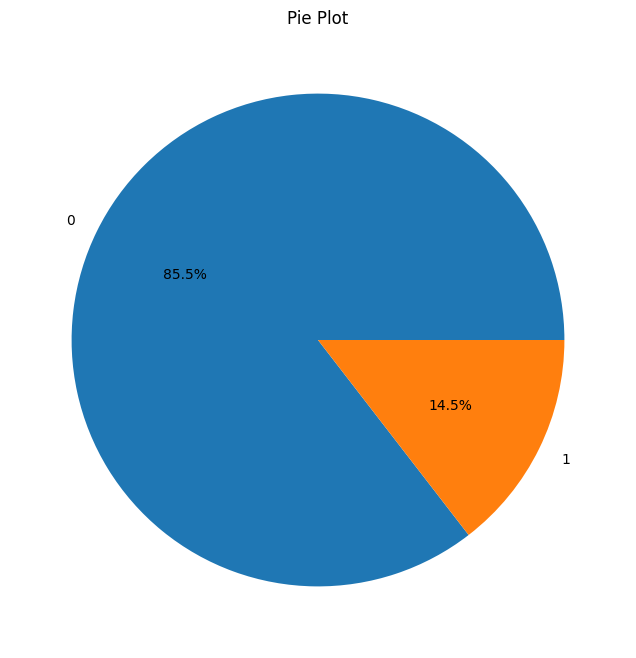

In [ ]:
# Построение круговой диаграммы
pos_neg = corpus["sentiment"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(pos_neg.values, labels=pos_neg.index, autopct='%1.1f%%')
plt.title('Pie Plot')
plt.show()

In [ ]:
corpus[134:]

,item_name,date,author,review,rating
134,Apple iPhone 11 256GB Черный,2023-10-13,Алина,"Здравствуйте) Очень переживала за товар, так к...",5
135,Apple iPhone 11 256GB Черный,2023-10-12,Николай,"Пришел телефон с дефектом, внешне вгдядит как ...",1
136,Apple iPhone 11 256GB Черный,2023-10-09,Ольга,Добрый день. Телефон пришел целый. Хорошо упак...,1
137,Apple iPhone 11 256GB Черный,2023-10-07,Юлия,"Телефон пришел хорошо упакован, целый в компле...",5
138,Apple iPhone 11 256GB Черный,2023-10-07,Марина,"Оформила возврат сразу в пункте выдачи, это пр...",1
...,...,...,...,...,...
106579,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-05-25,Ольга,"Первое впечатление хорошее, пришли те что зака...",5
106580,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-05-02,Ольга,"Уверена, что трвар хороший, но знак ""невозврат...",4
106581,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-03-09,Александра,"часы очень хорошие,брала не себе,а маме. Ей нр...",4
106582,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-02-27,Сергей,"Это пиндец!!!! Искал, выбирал! Выбрал шикарный...",1


# **3. START PREPROCESS**

## **3.1 Stat and simple features**

In [ ]:
# this dont work for some reason
#!pip install pyspellchecker

In [ ]:
!python -m pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.9 MB/s eta 0:00:00


In [ ]:
!pip install language_tool_python

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import language_tool_python

tool = language_tool_python.LanguageTool('ru-RU')

In [ ]:
# пишем функции таким образом, чтобы можно было по одному текст обрабатывать,
# потому что на инференсе отзывы обрабатываются по одному

def symbol_length(one_text: str) -> int:
  symbol_len = len(one_text)
  return symbol_len

def word_length(one_text: str) -> int:
  word_len = len(one_text.split(" "))
  return word_len

def average_word_length(one_text: str) -> float:
  symbol_len = len(one_text)
  word_len = len(one_text.split(" "))
  return symbol_len / word_len

def count_sentences(one_text: str) -> int:
    sentences = sent_tokenize(one_text)
    return len(sentences)

def average_sent_len(one_text: str) -> float:
    sent_len = count_sentences(one_text)
    word_len = word_length(one_text)
    return word_len / sent_len

def digit_part(one_text: str) -> float:
    digit_count = 0
    other_count = 0

    for char in one_text:
        if char.isdigit():
            digit_count += 1
        else:
            other_count += 1

    return digit_count / other_count

def caps_rate(one_text: str) -> float:
  sent_len = count_sentences(one_text)

  count = 0
  for letter in one_text:
      if letter.isupper():
          count += 1

  return count / sent_len

def uniq_rate(one_text: str) -> float:
  uniq_words = len(set(one_text.split()))
  all_words = len(one_text.split())
  return uniq_words / all_words

def flash_index(one_text: str):
  ASL = word_length(one_text) / count_sentences(one_text)
  ASW = symbol_length(one_text) / word_length(one_text)
  # адаптация для русского языка
  FRE = 206,835 - 1,52*ASL - 65,14*ASW
  return FRE

chars_to_ignore = "йцукенгшщзхъфывапролджэячсмитёьбюzxcvbnmasdfghjklqwertyuiop1234567890"
signs_to_ignore = "%/\':;?!,.?<>=+-_*&^$#(){}[]|№ "
ignore = chars_to_ignore + signs_to_ignore

def strange_sybmols_count(text_one : str):
  text_temp = "".join([ch for ch in text_one if ch not in ignore])
  return len(text_temp)

# Можно подумать об умном бин разбиении и вое преобразовании, так как имена разные и их много
def is_anonymus(one_author: str) -> int:
  if one_author == "Покупатель Wildberries":
    return 0
  else:
    return 1

# выводит количество слов с ошибками
def check_grammar(one_text: str) -> int:
  matches = tool.check(one_text)
  return len(matches)

In [ ]:
stat_features = [
    "symbol_length",
    "word_length",
    "average_word_length",
    "count_sentences",
    "average_sent_len",
    "digit_part",
    "caps_rate",
    "uniq_rate",
    "flash_index",
    "strange_sybmols_count",
    "is_anonymus",
    "check_grammar"
]

stat_ds = pd.DataFrame(columns=stat_features)

In [ ]:
stat_ds.symbol_length = corpus.review.apply(symbol_length)
stat_ds.word_length = corpus.review.apply(word_length)
stat_ds.average_word_length = corpus.review.apply(average_word_length)
stat_ds.count_sentences = corpus.review.apply(count_sentences)
stat_ds.average_sent_len = corpus.review.apply(average_sent_len)
stat_ds.digit_part = corpus.review.apply(digit_part)
stat_ds.caps_rate = corpus.review.apply(caps_rate)
stat_ds.uniq_rate = corpus.review.apply(uniq_rate)
stat_ds.flash_index = corpus.review.apply(flash_index)
stat_ds.strange_sybmols_count = corpus.review.apply(strange_sybmols_count)
stat_ds.is_anonymus = corpus.review.apply(is_anonymus)
stat_ds.check_grammar = corpus.review.apply(check_grammar)

## **3.2 Abstract features**

### **in product Similarity measure**

In [ ]:
# признак внутри одного продукта - насколько отзыв поход на другие внутри одного продукта.
# признак может указывать на то, что один и тот же человек написал положительный отзвы с разных аккаунтов

import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from time import time

In [ ]:
# Function to create TF-IDF vectors from a list of documents
def create_tfidf_vectors(docs):
    return TfidfVectorizer().fit_transform(docs).toarray()

# Function to calculate cosine similarity between two document vectors
def calc_cosine_similarity(vector1, vector2):
    return cosine_similarity([vector1, vector2])

# Function to check for plagiarism
def find_plagiarism():
    start = time()

    # Initialize an empty set to store plagiarism results
    plagiarism_results = set()

    # Access the global variable doc_filename_pairs
    global doc_filename_pairs

    # Iterate through each student's file and vector
    for student_a_file, student_a_vec in doc_filename_pairs:
        # Create a copy of the document-filename pairs for iteration
        remaining_pairs = doc_filename_pairs.copy()

        # Find the index of the current document-filename pair
        current_index = remaining_pairs.index((student_a_file, student_a_vec))

        # Remove the current pair from the remaining pairs
        del remaining_pairs[current_index]

        # Iterate through the remaining pairs to compare with other students
        for student_b_file, student_b_vec in remaining_pairs:
            # Calculate the cosine similarity between student_a_vec and student_b_vec
            similarity_score = calc_cosine_similarity(
                student_a_vec, student_b_vec)[0][1]

            # Sort the filenames to maintain consistency in results
            sorted_filenames = sorted((student_a_file, student_b_file))

            # Create a plagiarism result tuple with sorted filenames and similarity score
            plagiarism_result = (
                sorted_filenames[0], sorted_filenames[1], similarity_score)

            # Add the result to the plagiarism_results set
            plagiarism_results.add(plagiarism_result)
    print(start - time())
    # Return the set of plagiarism results
    return plagiarism_results


In [ ]:
sim_feach = []
index_2 = corpus.item_name.value_counts().iloc[lambda x: x.values>1].index
#index_2
corpus_plus = corpus.assign(sim_feach=0)

for row in index_2[::-1]:
  temp = corpus.loc[corpus.item_name == row].review
  print(temp)
  # Create TF-IDF vectors for the student documents
  doc_vec = create_tfidf_vectors(temp)
  print(doc_vec.shape)
  # Pair each document with its corresponding filename
  doc_filename_pairs = list(zip(list(temp.index), doc_vec))

  plagiarism_results = find_plagiarism()
  for result in plagiarism_results:
    print(result)
    #if result[2] > 0.6:
    corpus_plus.sim_feach[result[0]] =+ result[2]
    corpus_plus.sim_feach[result[1]] =+ result[2]


### **Santiment Measure**

In [ ]:
import torch

cuda = torch.device('cuda')
cuda

device(type='cuda')

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained('blanchefort/rubert-base-cased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('blanchefort/rubert-base-cased-sentiment', return_dict=True)

# Labels
# 0: NEUTRAL
# 1: POSITIVE
# 2: NEGATIVE

tokenizer_config.json:   0%|          | 0.00/499 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/943 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

In [ ]:
# после того как получили все сантименты
def abs_min_max_all(score, minn, maxx):

      feach = abs((2*score - minn - maxx)/(minn + maxx))
      return feach

In [ ]:
# на ГПУ
def predict_one(text):
    global counter
    inputs = tokenizer(text, max_length=512, padding=True, truncation=True, return_tensors='pt')
    outputs = model(**inputs)
    predicted = torch.nn.functional.softmax(outputs.logits, dim=1)
    #predicted = torch.argmax(predicted, dim=1).numpy()
    neu = predicted[0][0] / 2
    pos = predicted[0][1] + neu
    neg = predicted[0][2] + neu
    counter += 1
    if counter % 100 == 0:
      print(counter)
    return float(pos)

In [ ]:
# всё работает, но медленно
start = time.time()
counter = 0
corpus["santiment_measure"] = corpus.review.apply(lambda x: predict_one(x))
end = time.time()
print(end - start)

In [ ]:
minn = corpus["santiment_measure"].min()
maxx = corpus["santiment_measure"].max()

In [ ]:
corpus["santiment_measure"] = corpus.santiment_measure.apply(lambda x: abs_min_max_all(x, minn, maxx))

In [ ]:
predict_one(corpus.review[0])

Изначально испугалась, потому что нажимаю на выбор языка русский он не нажимается, 30 минут возюкалась потом перезагрузила все начало работать, все перенесла, телефон хороший не глючит акб 100% спасибо продавцу за хороший оригинальный телефон, надеюсь прослужит долго☺️


0.9729426503181458

In [ ]:
list(corpus.review.values)

### **Prod_title_review_closeness**

## **3.3 Freauency features**

In [ ]:
# посмотрим какие символы вообще есть в тексте помимо русских букв

def what_chars_do_we_have(dataframe):
    text = list()
    chars = "йцукенгшщзхъфывапролджэячсмитёьбю\n"
    for i in tqdm.tqdm(dataframe):
        temp = i.lower()
        text_temp = "".join([ch for ch in temp if ch not in chars])
        text.append(text_temp)

    return text


evr = set()
tempy = what_chars_do_we_have(corpus.review)
for i in tempy:
    evr = evr | set(i)

# \xa0 - space
evr

# выделим большое количество смайликов

In [ ]:
import re

chars_to_ignore = "йцукенгшщзхъфывапролджэячсмитёьбюzxcvbnmasdfghjklqwertyuiop1234567890"
signs_to_ignore = "%/\':;?!,.?<>=+-_*&^$#(){}[]|№ "
ignore = chars_to_ignore + signs_to_ignore

# оставляем те символы что есть в игноре
def replace_characters(one_text: str):
    pattern = f'[^{" ".join(map(re.escape, ignore))}]'
    return re.sub(pattern, '', one_text.lower())

In [ ]:
clear_corp["clear_review"] = clear_corp.review.apply(replace_characters)

In [ ]:
clear_corp

,item_name,date,author,review,rating,clear_review
0,Apple iPhone 14 6+128GB,2023-12-11,Милуся,"Изначально испугалась, потому что нажимаю на в...",5,"изначально испугалась, потому что нажимаю на в..."
1,Apple iPhone 14 6+128GB,2023-12-10,Вера,"Пришёл на 2 дня раньше заявленного срока, в об...",5,"пришёл на 2 дня раньше заявленного срока, в об..."
2,Apple iPhone 14 6+128GB,2023-12-08,Давид,"Телефон оригинальный , не активированный , сму...",4,"телефон оригинальный , не активированный , сму..."
3,Apple iPhone 14 6+128GB,2023-12-08,Алина Герасимова,"Очень боялась заказывать, но решилась. Телефон...",5,"очень боялась заказывать, но решилась. телефон..."
4,Apple iPhone 14 6+128GB,2023-12-04,Александра,"Забрала на день раньше,новый,пломбы на месте,б...",5,"забрала на день раньше,новый,пломбы на месте,б..."
...,...,...,...,...,...,...
80197,Men’s & Women’s shop Настольные часы Электронные,2023-07-30,Едил,Будильник не работает. Хотя нужен был именно б...,1,будильник не работает. хотя нужен был именно б...
80198,Men’s & Women’s shop Настольные часы Электронные,2023-07-21,Ирина,Пользуемся несколько месяцев. Отличные часы. Я...,5,пользуемся несколько месяцев. отличные часы. я...
80199,Men’s & Women’s shop Настольные часы Электронные,2022-12-06,Петров,Отличные часы.все работает.пришло хорошо все у...,5,отличные часы.все работает.пришло хорошо все у...
80200,Men’s & Women’s shop Настольные часы Электронные,2022-11-05,Ольга,"Часы работают, вроде все как хотели, габариты ...",4,"часы работают, вроде все как хотели, габариты ..."


In [ ]:
clear_corp.review[0]

'Изначально испугалась, потому что нажимаю на выбор языка русский он не нажимается, 30 минут возюкалась потом перезагрузила все начало работать, все перенесла, телефон хороший не глючит акб 100% спасибо продавцу за хороший оригинальный телефон, надеюсь прослужит долго☺️'

In [ ]:
clear_corp.clear_review[0]

'изначально испугалась, потому что нажимаю на выбор языка русский он не нажимается, 30 минут возюкалась потом перезагрузила все начало работать, все перенесла, телефон хороший не глючит акб 100% спасибо продавцу за хороший оригинальный телефон, надеюсь прослужит долго'

### **puncts**

In [ ]:
# Новая группа признаков: частоты знаков препинания
# используем неочищенный корпус

from string import punctuation
from collections import Counter

punctuation = [".", ',', "!", "?", "-", "—", ":", '"', "'"]
extra = ['(', ')', '*', '[', ']']
all_puncts = punctuation + extra

def count_punct(text_one : str) -> int:

    # punctuation = punctuation + extra
    return [text_one.count(i) for i in all_puncts]

In [ ]:
# считаем частоты

ds_punct = [count_punct(i) for i in tqdm.tqdm(corpus.review)]
df_punct = pd.DataFrame(ds_punct, columns=all_puncts).add_prefix('punct_')

df_punct.head(10)

100%|██████████| 106584/106584 [00:01<00:00, 91937.55it/s]


,punct_.,"punct_,",punct_!,punct_?,punct_-,punct_—,punct_:,"punct_""",punct_',punct_(,punct_),punct_*,punct_[,punct_]
0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
1,3,4,0,0,0,0,0,0,0,0,0,0,0,0
2,0,4,0,0,1,0,0,0,0,0,0,0,0,0
3,5,8,0,0,0,0,0,0,0,0,0,0,0,0
4,0,12,1,0,1,0,0,0,0,0,0,0,0,0
5,4,2,1,0,0,0,0,0,0,0,1,0,0,0
6,3,3,0,0,0,0,0,2,0,0,0,0,0,0
7,2,8,0,0,0,0,0,0,0,0,0,0,0,0
8,1,4,0,0,0,0,0,0,0,0,0,0,0,0
9,4,4,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
punct_path = "/content/drive/MyDrive/diplom/data/punct_df.csv"
df_punct.to_csv(punct_path)

In [ ]:
punct_path = "/content/drive/MyDrive/diplom/data/punct_df.csv"
df_punct = pd.read_csv(punct_path)

### **gram errors**

In [ ]:
# предварительно нужно будет очистить от странных символов датасет.
# по типу ошибок, частотность

errors = ["UPPERCASE_SENTENCE_START",
          "COMMA_PARENTHESIS_WHITESPACE",
          "MORFOLOGIK_RULE_RU_RU",
          "DOUBLE_PUNCTUATION",
          "RU_SIMPLE_REPLACE",
          "RU_UNPAIRED_BRACKETS",
          "SENTENCE_WHITESPACE",
          "Unify_Adj_NN_case",
          "Verb_and_Verb",
          "DoubleNOT",

          ]

def check_grammar(one_text: str) -> int:
  matches = tool.check(one_text)
  rules_type = [i.ruleId for i in matches]
  for i in rules_type:
    if i not in errors:
      print(i)

  return [rules_type.count(i) for i in errors]

In [ ]:
ds_error = [check_grammar(i) for i in tqdm.tqdm(corpus.review)]

df_error = pd.DataFrame(ds_error, columns=errors).add_prefix('error_')

df_punct.head(10)

In [ ]:
one_text = "сделай то , о чём я приготоветь.."

matches = tool.check(one_text)
matches

[Match({'ruleId': 'UPPERCASE_SENTENCE_START', 'message': 'Это предложение не начинается с заглавной буквы.', 'replacements': ['Сделай'], 'offsetInContext': 0, 'context': 'сделай то , о чём я приготоветь..', 'offset': 0, 'errorLength': 6, 'category': 'CASING', 'ruleIssueType': 'typographical', 'sentence': 'сделай то , о чём я приготоветь..'}),
 Match({'ruleId': 'COMMA_PARENTHESIS_WHITESPACE', 'message': 'Поставьте пробел после запятой, а не перед ней.', 'replacements': [','], 'offsetInContext': 9, 'context': 'сделай то , о чём я приготоветь..', 'offset': 9, 'errorLength': 2, 'category': 'TYPOGRAPHY', 'ruleIssueType': 'whitespace', 'sentence': 'сделай то , о чём я приготоветь..'}),
 Match({'ruleId': 'MORFOLOGIK_RULE_RU_RU', 'message': 'Возможно найдена орфографическая ошибка.', 'replacements': ['приготовить', 'приготовит', 'приготовите', 'приготовишь', 'приготовясь', 'приготовят'], 'offsetInContext': 20, 'context': 'сделай то , о чём я приготоветь..', 'offset': 20, 'errorLength': 11, 'ca

In [ ]:
punct_path = "/content/drive/MyDrive/diplom/data/punct_df.csv"
df_punct.to_csv(punct_path)

In [ ]:
punct_path = "/content/drive/MyDrive/diplom/data/punct_df.csv"
df_punct = pd.read_csv(punct_path)

### **words counts**

In [ ]:
!pip install pymorphy2

In [ ]:
import string
from nltk.stem.snowball import SnowballStemmer
from pymorphy2 import MorphAnalyzer

# первая группа признаков: слова и их n-gramms
# получается сильно разряженная матрица признаков, сократим словарь ч\з стэмминг или лемматизацию (получим три разных сэта)

stemmer = SnowballStemmer("russian")
morph = MorphAnalyzer()

def tokenizer(text):
    return text.split()

def tokenizer_stemmer(text):
    string =""
    for word in text.split():
        string = string + " " + stemmer.stem(word)
    return string

# наиболее предпочтительный
def lemmatize(one_text: str) -> str:
    string =""
    for word in one_text.split():
        string = string + " " + morph.normal_forms(word)[0]
    return string

In [ ]:
# работает относительно долго
start = time.time()
clear_corp["lemms"] = clear_corp.clear_review.apply(lemmatize)
print(time.time() - start)

505.0005385875702


In [ ]:
clear_corp.lemms

0         изначально испугалась, потому что нажимать на...
1         прийти на 2 день ранний заявить срока, в обыч...
2         телефон оригинальный , не активированный , см...
3         очень бояться заказывать, но решилась. телефо...
4         забрать на день раньше,новый,пломб на месте,б...
                               ...                        
80197     будильник не работает. хотя нужный быть именн...
80198     пользоваться несколько месяцев. отличный часы...
80199     отличный часы.все работает.прийти хорошо всё ...
80200     часы работают, вроде всё как хотели, габарит ...
80201     часы работают. цифра зелёный цвета. быть купи...
Name: lemms, Length: 80202, dtype: object

In [ ]:
clear_corp.lemms[0]

' изначально испугалась, потому что нажимать на выбор язык русский он не нажимается, 30 минута возюкаться потом перезагрузить всё начало работать, всё перенесла, телефон хороший не глючить акб 100% спасибо продавец за хороший оригинальный телефон, надеяться прослужить долго'

In [ ]:
# можно заменить что 80_000 это большой датасет и BOW много затрат вычислительных
# урежем датасет

from sklearn.model_selection import train_test_split

only_neg = clear_corp[clear_corp["Santiment"] == 1]
only_pos = clear_corp[clear_corp["Santiment"] == 1][:20_000]

In [ ]:
# Используем модель bag of words

# группа признаков: все слова и их n-gramm'ы

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# кажется что словосочетания здесь бесполезны, а отдельные слова очень
# даже могут быть информативны, особенно после лемматизации
# со значением min_df и max_features нужно эксперементировать
# нужно подумать на счет стоп-слов
vectorizer = CountVectorizer(ngram_range=(1,1),
                             analyzer='word',
                             min_df=10,
                             max_features=10_000,
                             stop_words=None
                             )

#vectorizer_2_gram = CountVectorizer(ngram_range=(1,2), analyzer='word')
#np.set_printoptions(precision=2)

# некоторые слова являются более значимыми, чем другие. Используем tf-idf

tfidf = TfidfTransformer(use_idf=True,
                         norm='l2',
                         smooth_idf=True)

In [ ]:
# first data sets

"""
X_stem_vectorized = pd.DataFrame(vectorizer.fit_transform(stemmed).toarray(),
                                 columns=vectorizer.get_feature_names_out()).add_prefix('word_')
X_stem_vectorized_2_gram = pd.DataFrame(vectorizer_2_gram.fit_transform(stemmed).toarray(),
                                        columns=vectorizer_2_gram.get_feature_names_out()).add_prefix('word_')
X_stem_tfidf_vectorized = pd.DataFrame(tfidf.fit_transform(X_stem_vectorized).toarray(),
                                       columns=tfidf.get_feature_names_out())
"""

start = time.time()
# second data sets
X_vectorized = pd.DataFrame(vectorizer.fit_transform(clear_corp["lemms"]).toarray(),
                            columns=vectorizer.get_feature_names_out()).add_prefix('word_')

print(time.time() - start)
"""
X_vectorized_2_gram = pd.DataFrame(vectorizer_2_gram.fit_transform(X_clear).toarray(),
                                   columns=vectorizer_2_gram.get_feature_names_out()).add_prefix('word_')

X_tdidf_vectorized_2_gram = pd.DataFrame(tfidf.fit_transform(X_vectorized_2_gram).toarray(),
                                  columns=tfidf.get_feature_names_out())
#"""

In [ ]:
start = time.time()
X_tdidf_vectorized = pd.DataFrame(tfidf.fit_transform(X_vectorized).toarray(),
                                  columns=tfidf.get_feature_names_out())
print(time.time() - start)

In [ ]:
"""
X_lem_vectorized_2_gram = pd.DataFrame(vectorizer_2_gram.fit_transform(lemms).toarray(),
                                       columns=vectorizer_2_gram.get_feature_names_out()).add_prefix('word_')
"""

### **symbols patterns**

In [ ]:
# Слудующая группа признаков: КЛАССИФИКАЦИЯ НА ОСНОВЕ СИМВОЛОВ
# symbols dataset
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# нужно просто эксперементировать
vectorizer_1_1 = CountVectorizer(ngram_range=(1,1), analyzer='char')
vectorizer_1_2 = CountVectorizer(ngram_range=(1,2), analyzer='char')
vectorizer_2_2 = CountVectorizer(ngram_range=(2,2), analyzer='char')
vectorizer_2_3 = CountVectorizer(ngram_range=(2,3), analyzer='char')
vectorizer_3_3 = CountVectorizer(ngram_range=(3,3), analyzer='char')
vectorizer_3_4 = CountVectorizer(ngram_range=(3,4), analyzer='char')  # got to be best 1
vectorizer_2_4 = CountVectorizer(ngram_range=(2,4), analyzer='char')  # got to be best 2
vectorizer_2_5 = CountVectorizer(ngram_range=(2,5), analyzer='char')

# используем исходный корпус текстов без изменений, однако признаков всё равно меньше,

### **syntax features**

In [ ]:
# синтаксические отношения
# используем неочищенный корпус

import spacy
from spacy import displacy

import locale
locale.getpreferredencoding = lambda: "UTF-8"

# раскомментировать если модель не установлена - на диске нет
!python -m spacy download ru_core_news_sm

2023-12-17 14:01:30.681645: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 14:01:30.681703: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 14:01:30.682946: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-17 14:01:31.828800: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 965.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 33.8 MB/s eta 0:00:00

In [ ]:
# на основе поэмы составим таблицу признаков по синтаксическим зависимостям
# здесь нужен корпус с пунктуацией, но без \n
nlp = spacy.load('ru_core_news_sm')

syntax_list = [ 'mark',          'ROOT',         'nsubj',
              'advmod',           'obj',         'punct',           'dep',
                'iobj',     'acl:relcl',          'case',          'amod',
                 'obl',            'cc',          'conj',     'flat:name',
                'nmod',           'det',         'appos',           'cop',
           'parataxis',         'xcomp',         'ccomp',         'advcl',
          'nsubj:pass',           'aux',         'fixed',           'acl',
           'obl:agent',      'aux:pass',         'csubj',    'nummod:gov',
              'nummod',     'discourse', 'nummod:entity',  'flat:foreign',
                'expl',      'compound',        'orphan',          'flat',
          'csubj:pass']


def syntax_feach(text_one : str) -> int:
    doc = nlp(text_one)
    types = [i.dep_ for i in doc]
    # punctuation = punctuation + extra
    return [types.count(i) for i in syntax_list]

In [ ]:
# считаем частоты - где-то минут 15 для 80_000 данных

ds_syntax = [syntax_feach(i) for i in tqdm.tqdm(clear_corp.review)]
df_syntax = pd.DataFrame(ds_syntax, columns=syntax_list).add_prefix('syntax_')

df_syntax.head(10)